In [1]:
import fastf1

In [5]:
import os

# Define the cache directory path
cache_dir = 'cache'

# Create the directory if it doesn't exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

In [6]:
fastf1.Cache.enable_cache(cache_dir) 
# Enable caching to speed up data retrieval

In [17]:
session = fastf1.get_session(2025, 'British', 'Q')
session.load()

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.6.0]


req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for 

In [18]:
laps = session.laps
print(laps.columns)

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')


In [19]:
session.drivers

['1',
 '81',
 '4',
 '63',
 '44',
 '16',
 '12',
 '87',
 '14',
 '10',
 '55',
 '22',
 '6',
 '23',
 '31',
 '30',
 '5',
 '18',
 '27',
 '43']

In [20]:
session.results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'Laps'],
      dtype='object')

In [23]:
session.results[session.results['TeamName']=='Ferrari']

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,Laps
44,44,L HAMILTON,HAM,hamilton,Ferrari,ED1131,ferrari,Lewis,Hamilton,Lewis Hamilton,...,5.0,,NaN,0 days 00:01:26.296000,0 days 00:01:25.084000,0 days 00:01:25.095000,NaT,,NaN,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,ED1131,ferrari,Charles,Leclerc,Charles Leclerc,...,6.0,,NaN,0 days 00:01:26.186000,0 days 00:01:25.133000,0 days 00:01:25.121000,NaT,,NaN,NaN


In [24]:
import matplotlib.pyplot as plt

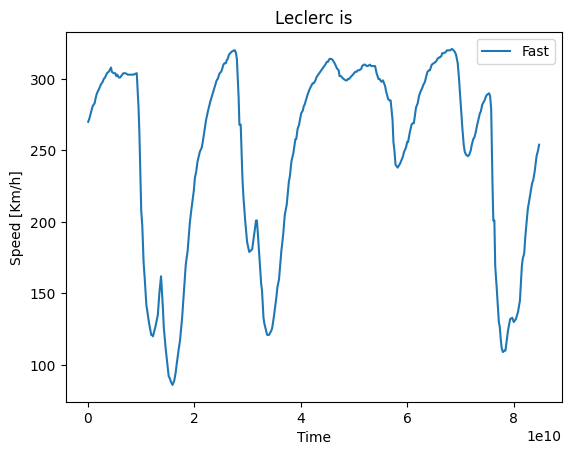

In [25]:
fast_leclerc = session.laps.pick_drivers('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

In [26]:
# to load a race session

In [27]:
race_session = fastf1.get_session(2023, 'British', 'R')
race_session.load()

core           INFO 	Loading data for British Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [29]:
race_laps = race_session.laps
print(race_laps.columns)

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')


In [31]:
lec_fastest = race_laps.pick_drivers('LEC').pick_fastest()
print("Leclerc's fastest lap:")
print(lec_fastest['LapTime'])

ver_fastest = race_laps.pick_drivers('VER').pick_fastest()
print("Verstappen's fastest lap:")
print(ver_fastest['LapTime'])

Leclerc's fastest lap:
0 days 00:01:31.255000
Verstappen's fastest lap:
0 days 00:01:30.275000


In [32]:
session.event

RoundNumber                                                       12
Country                                               United Kingdom
Location                                                 Silverstone
OfficialEventName    FORMULA 1 QATAR AIRWAYS BRITISH GRAND PRIX 2025
EventDate                                        2025-07-06 00:00:00
EventName                                         British Grand Prix
EventFormat                                             conventional
Session1                                                  Practice 1
Session1Date                               2025-07-04 12:30:00+01:00
Session1DateUtc                                  2025-07-04 11:30:00
Session2                                                  Practice 2
Session2Date                               2025-07-04 16:00:00+01:00
Session2DateUtc                                  2025-07-04 15:00:00
Session3                                                  Practice 3
Session3Date                      

In [33]:
session.event.EventName

'British Grand Prix'

In [34]:
event = fastf1.get_event(2024, 'monza')

In [35]:
event.EventName

'Italian Grand Prix'

In [38]:
schedule = fastf1.get_event_schedule(2025)
schedule.head()

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2025,2025-02-28,Pre-Season Testing,testing,Practice 1,2025-02-26 10:00:00+03:00,2025-02-26 07:00:00,...,Practice 3,2025-02-28 10:00:00+03:00,2025-02-28 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Australia,Melbourne,FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX ...,2025-03-16,Australian Grand Prix,conventional,Practice 1,2025-03-14 12:30:00+11:00,2025-03-14 01:30:00,...,Practice 3,2025-03-15 12:30:00+11:00,2025-03-15 01:30:00,Qualifying,2025-03-15 16:00:00+11:00,2025-03-15 05:00:00,Race,2025-03-16 15:00:00+11:00,2025-03-16 04:00:00,True
2,2,China,Shanghai,FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025,2025-03-23,Chinese Grand Prix,sprint_qualifying,Practice 1,2025-03-21 11:30:00+08:00,2025-03-21 03:30:00,...,Sprint,2025-03-22 11:00:00+08:00,2025-03-22 03:00:00,Qualifying,2025-03-22 15:00:00+08:00,2025-03-22 07:00:00,Race,2025-03-23 15:00:00+08:00,2025-03-23 07:00:00,True
3,3,Japan,Suzuka,FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025,2025-04-06,Japanese Grand Prix,conventional,Practice 1,2025-04-04 11:30:00+09:00,2025-04-04 02:30:00,...,Practice 3,2025-04-05 11:30:00+09:00,2025-04-05 02:30:00,Qualifying,2025-04-05 15:00:00+09:00,2025-04-05 06:00:00,Race,2025-04-06 14:00:00+09:00,2025-04-06 05:00:00,True
4,4,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2025,2025-04-13,Bahrain Grand Prix,conventional,Practice 1,2025-04-11 14:30:00+03:00,2025-04-11 11:30:00,...,Practice 3,2025-04-12 15:30:00+03:00,2025-04-12 12:30:00,Qualifying,2025-04-12 19:00:00+03:00,2025-04-12 16:00:00,Race,2025-04-13 18:00:00+03:00,2025-04-13 15:00:00,True


In [51]:
session = fastf1.get_session(2025, 'British', 'R')
session.load()

laps = session.laps
ver_laps = laps.pick_driver('VER')
lec_laps = laps.pick_driver('LEC')

core           INFO 	Loading data for British Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [59]:
# Get the fastest lap for each driver
ver_fastest = race_laps.pick_drivers('VER').pick_fastest()
lec_fastest = race_laps.pick_drivers('LEC').pick_fastest()

# Get positional telemetry for the fastest lap
ver_pos = ver_fastest.get_pos_data()
lec_pos = lec_fastest.get_pos_data()

print(ver_pos.columns)
print(lec_pos.columns)

Index(['Date', 'Status', 'X', 'Y', 'Z', 'Source', 'Time', 'SessionTime'], dtype='object')
Index(['Date', 'Status', 'X', 'Y', 'Z', 'Source', 'Time', 'SessionTime'], dtype='object')


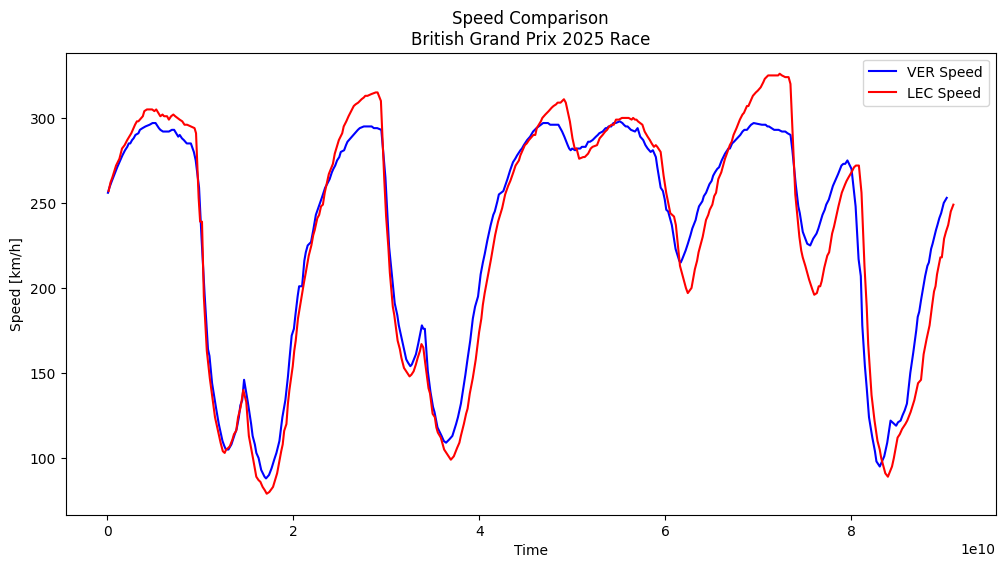

In [62]:
# Get the fastest lap for each driver
ver_fastest = race_laps.pick_drivers('VER').pick_fastest()
lec_fastest = race_laps.pick_drivers('LEC').pick_fastest()

# Get car telemetry for the fastest lap
ver_car = ver_fastest.get_car_data()
lec_car = lec_fastest.get_car_data()

# Plot speed comparison
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ver_car['Time'], ver_car['Speed'], color='blue', label='VER Speed')
ax.plot(lec_car['Time'], lec_car['Speed'], color='red', label='LEC Speed')
ax.set_title(f"Speed Comparison\n{session.event['EventName']} {session.event.year} Race")
ax.set_xlabel("Time")
ax.set_ylabel("Speed [km/h]")
ax.legend()
plt.show()

In [63]:
session.weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:19.723000,18.0,85.0,988.6,False,24.2,174,0.7
1,0 days 00:01:19.675000,18.0,83.0,988.5,False,24.6,111,0.9
2,0 days 00:02:19.683000,18.1,82.0,988.6,False,24.6,61,2.2
3,0 days 00:03:19.685000,18.0,81.0,988.6,False,24.1,71,3.1
4,0 days 00:04:19.683000,18.0,79.0,988.5,False,23.9,28,3.0
...,...,...,...,...,...,...,...,...
150,0 days 02:30:20.275000,19.3,65.0,989.1,False,24.4,95,1.1
151,0 days 02:31:20.287000,19.4,64.0,989.0,False,24.4,230,1.9
152,0 days 02:32:20.278000,19.5,65.0,989.0,False,24.6,287,1.5
153,0 days 02:33:20.278000,19.5,64.0,989.0,False,24.6,48,1.6


In [64]:
ver_laps = race_laps.pick_drivers('VER')
clean_ver_laps = ver_laps[ver_laps['LapTime'].notnull() & (ver_laps['PitInTime'].isnull()) & (ver_laps['PitOutTime'].isnull())]

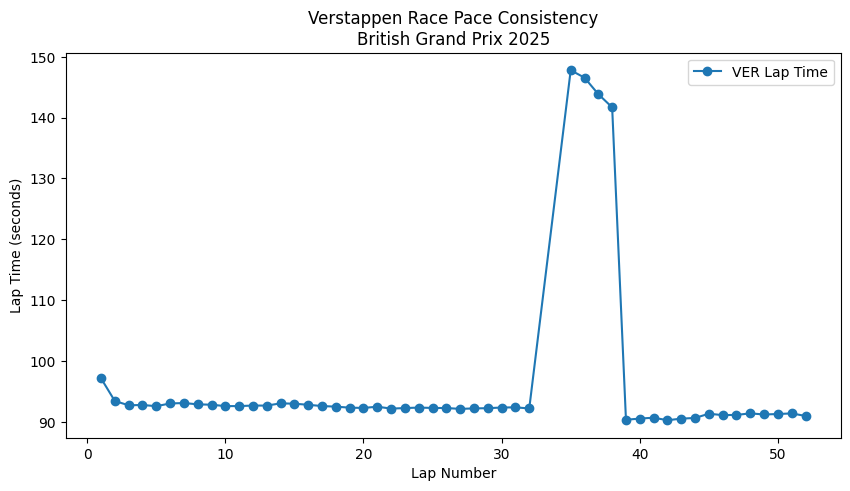

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(clean_ver_laps['LapNumber'], clean_ver_laps['LapTime'].dt.total_seconds(), marker='o', label='VER Lap Time')
ax.set_title(f"Verstappen Race Pace Consistency\n{session.event['EventName']} {session.event.year}")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time (seconds)")
ax.legend()
plt.show()